**Isaias Chavarria Mora**

*How to determne if two people are related?*
Related people is determined by the train_relationships.csv file, so what is needed to do based on that doument is to build the image pairs of all the family individuals of families and according to the csv file, label them with 1 or 0 as a relationship indicator.

In [19]:
import pandas as pd
import numpy as np
import glob
from collections import defaultdict
import os
import glob
from itertools import combinations
import csv

In [20]:
BASE_PATH_DIRECTORY = "train"

In [21]:
training_data = pd.read_csv('train_relationships.csv')
training_data['p1'] = training_data['p1'].apply(lambda x: BASE_PATH_DIRECTORY + os.sep + x )
training_data['p2'] = training_data.p2.apply(lambda x: BASE_PATH_DIRECTORY+ os.sep + x )
training_data['p1'] = training_data['p1'].apply(lambda x: x.replace("/", os.sep) )
training_data['p2'] = training_data.p2.apply(lambda x: x.replace("/", os.sep) )
print(training_data.head(10))
training_data.size

                 p1                p2
0  train\F0002\MID1  train\F0002\MID3
1  train\F0002\MID2  train\F0002\MID3
2  train\F0005\MID1  train\F0005\MID2
3  train\F0005\MID3  train\F0005\MID2
4  train\F0009\MID1  train\F0009\MID4
5  train\F0009\MID1  train\F0009\MID3
6  train\F0009\MID1  train\F0009\MID2
7  train\F0009\MID1  train\F0009\MID6
8  train\F0009\MID2  train\F0009\MID4
9  train\F0009\MID2  train\F0009\MID6


7196

In [22]:
labeled_relationships = []
for ind in training_data.index:
    label_dict = {}
    label_dict["p1"] = training_data['p1'][ind]
    label_dict["p2"] = training_data['p2'][ind]
    labeled_relationships.append(label_dict)

Generate the combinations for all Family members, excluding repetitions

In [23]:

family_folders = glob.glob(os.path.join(BASE_PATH_DIRECTORY, "*"))
familiy_relations = []
with open('family_member_combinations.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['p1', 'p2', 'result'])

    for family in family_folders:
        member_folders = glob.glob(os.path.join(family, '*'))
        
        for (member1, member2) in combinations(member_folders, 2):
            result=0
            if any(x["p1"] == member1 for x in labeled_relationships) and any(y["p2"] == member2 for y in labeled_relationships):
                result = 1
            elif any(z["p2"] == member1 for z in labeled_relationships) and any(w["p1"] == member2 for w in labeled_relationships):
                result = 1
            else:
                result = 0
            csvwriter.writerow([member1, member2, result])

In [24]:
training_data_completed = pd.read_csv('family_member_combinations.csv')
print(training_data_completed.head(10))
training_data_completed.size

                 p1                p2  result
0  train\F0002\MID1  train\F0002\MID2       0
1  train\F0002\MID1  train\F0002\MID3       1
2  train\F0002\MID2  train\F0002\MID3       1
3  train\F0005\MID1  train\F0005\MID2       1
4  train\F0005\MID1  train\F0005\MID3       0
5  train\F0005\MID2  train\F0005\MID3       1
6  train\F0009\MID1  train\F0009\MID2       1
7  train\F0009\MID1  train\F0009\MID3       1
8  train\F0009\MID1  train\F0009\MID4       1
9  train\F0009\MID1  train\F0009\MID5       1


18780

**Generate Training Data**

To simplify the Model inputs, in the data preprocessing, generate a document with the image pairs and coresponding labels, to this document will feed the model training loader, and can be divided in training and test portions.

In [26]:
row_list = []
for ind in training_data_completed.index:
  member1 = []
  member2 = []
  #EXTRACT all images from each member Folder
  for mem1 in glob.glob(training_data_completed['p1'][ind] + os.sep + '*'):
      member1.append(mem1)
  for mem2 in glob.glob(training_data_completed['p2'][ind] + os.sep + '*'):
      member2.append(mem2)
#   print("member1 ", len(member1), " member 2 ", len(member2))
  for x in range(0, len(member1) - 1):
      for y in range(0, len(member2) - 1):
        dict_members = {}
        path1=member1[x]
        path2=member2[y]
        dict_members["p1"] = path1
        dict_members["p2"] = path2
        dict_members["result"] = training_data_completed['result'][ind]
        row_list.append(dict_members)
training_detailed = pd.DataFrame(row_list)
print("Size of DF ", training_detailed.size, " Size of rowList ", len(row_list))
training_detailed.head(10)
training_detailed.to_csv("training_data_ready_for_nn_large.csv", columns=["p1", "p2", "result"], index=False)

Size of DF  1066818  Size of rowList  355606


# Example of the Model input Data

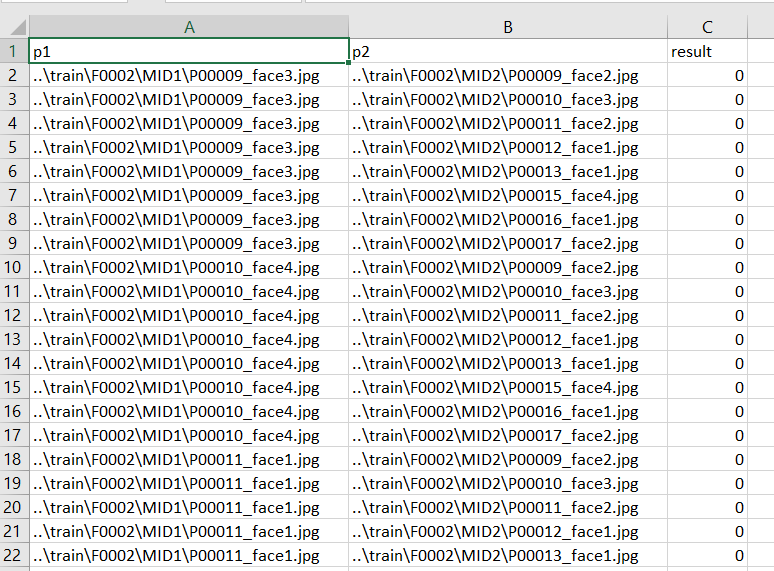